# Исследование и прогнозирование оттока клиентов фитнес-центра

## Описание проекта и общий обзор данных

### Оглавление

>[Исследование и прогнозирование оттока клиентов фитнес-центра](#scrollTo=m8BM3skXL_S8)

>>[Описание проекта и общий обзор данных](#scrollTo=cBx7AnF4MRKp)

>>>[Оглавление](#scrollTo=vtrjBc0ibBvl)

>>>[Описание проекта](#scrollTo=xnB6E6cHbB2L)

>>>[Описание данных](#scrollTo=Y0Kxd0GRbByT)

>>>[Загрузка и общий обзор данных](#scrollTo=byKivIn1bBrj)

>>[Исследовательский анализ](#scrollTo=1VF7v3Tncr0E)

>>>[Средние значения и стандартные отклонения](#scrollTo=aUdnWm47bxI3)

>>>[Матрица корреляций](#scrollTo=h8GsZPesbxAv)

>>>[Выводы](#scrollTo=X5AIgTJAfaOa)

>>[Построение модели прогнозирования оттока клиентов](#scrollTo=W4cCM9mFbw22)

>>>[Подготовка данных и построение модели LogisticRegression](#scrollTo=NsgsXUDW5v7V)

>>>[ROC-кривая для модели логистической регрессии](#scrollTo=x3Z__5U56Ib5)

>>>[Постороение модели RandomForestClassifier](#scrollTo=e_8M5sZ66b04)

>>>[ROC-кривая для модели на основе алгоритма случайного леса](#scrollTo=QufkOPsv6mX5)

>>>[Выводы:](#scrollTo=j2Vn1zKcbwlZ)

>>[Кластеризация клиентов](#scrollTo=i7pEBCJGbvzH)

>>>[Матрица растояний и дендрограмма](#scrollTo=nIVPevhR445O)

>>>[Модель кластеризации на основании алгоритма K-Means](#scrollTo=fTk9tIxf9lJz)

>>>[Доля оттока по кластерам](#scrollTo=uab9V3jHOdun)

>>>[Выводы:](#scrollTo=m3MX_MuWfmsU)

>>[Выводы и базовые рекомендации по работе с клиентами](#scrollTo=5KtsPhZfe2N_)



### Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённой проблемой фитнес-центров является  отток клиентов. Для рассматриваемой ситуации можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил фитнес-центр.

Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет и данные о пользовательской активности и предоставил эти сведения в файле `gym_churn.csv`.

__Цель проекта:__

- Провести анализ предоставленных данных и, используя средства машинного обучения, спрогнозировать вероятность оттока клиентов на уровне следующего месяца;

- подготовить план действий по удержанию клиентов.

__Данные:__

В проекте используются данные о клиентах (пол, возраст, факт проживания или работы в районе, где находится фитнес-центр, факт использования промокода для получения скидки при оплате и т.д.) за месяц до оттока и факт оттока на определённый месяц, а также данные о пользовательской активности клиентов: посещение групповых занятий, частота посещения центра, суммарная выручка от дополнительных услуг и другие.

__Задачи:__

В рамках данного проекта необходимо:

- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

- проанализировать основные признаки, наиболее сильно влияющие на отток;

- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

  1) выделить целевые группы клиентов;

  2) предложить меры по снижению оттока;

  3) определить другие особенности взаимодействия с клиентами.

### Описание данных

Отдел по работе с клиентами подготовил данные, которые содержат данные за месяц до оттока и факт оттока на определённый месяц.

Набор данных включает следующие поля:
___________
Данные клиента за предыдущий месяц до проверки факта оттока:

- `gender` — пол;

- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;

- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

- `Phone` — наличие контактного телефона;

- `Age` — возраст;

- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
__________
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);

- `Group_visits` — факт посещения групповых занятий;

- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;

- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;

- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
________
- `Churn` — факт оттока в текущем месяце.

### Загрузка и общий обзор данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [ ]:
# загрузка данных
data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
# перевод названий столбцов в нижний регистр
data.columns = data.columns.str.lower()
data.shape

(4000, 14)

In [ ]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
# проверка на пропуски
display("Missing values:", data.isna().sum())

'Missing values:'

,0
gender,0
near_location,0
partner,0
promo_friends,0
phone,0
contract_period,0
group_visits,0
age,0
avg_additional_charges_total,0
month_to_end_contract,0


In [ ]:
# проверка на дубликаты
data = data.drop_duplicates()
data.shape

(4000, 14)

In [ ]:
#data.columns.tolist()

In [ ]:
# количество уникальных значений параметров
data.nunique()

,0
gender,2
near_location,2
partner,2
promo_friends,2
phone,2
contract_period,3
group_visits,2
age,23
avg_additional_charges_total,4000
month_to_end_contract,12


In [ ]:
# проверка бинарных признаков
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'month_to_end_contract', 'churn']

for column in columns:
    print(column, data[column].unique())

gender [1 0]
near_location [1 0]
partner [1 0]
promo_friends [1 0]
phone [0 1]
contract_period [ 6 12  1]
group_visits [1 0]
month_to_end_contract [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
churn [0 1]


__Итого:__ Пропусков и дубликатов в данных нет, что здорово облегчает дальнейшую работу и говорит о хорошей подготовке данных. Все наборы данных соответствуют описанию, а типы данных соответствуют параметру.

Часть параметров являются бинарными признаками (имеют только два уникальных значения 0/1).


## Исследовательский анализ

### Средние значения и стандартные отклонения

In [ ]:
# средние значения и стандартные отклонения
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [ ]:
# средние значения и стандартные отклонения признаков с непрерывными числовыми значениями
data[['contract_period', 'age',	'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


__Итого:__ Средние значения и стандартные отклонения признаков показывают, что:

- мужчин и женщин среди клиентов почти поровну;

- бОльшая часть клиентов проживает или работает поблизости;

- почти половина клиентов - сотрудники компаний-партнеров клуба;

- около трети клиентов воспользовались промокодом от знакомого при оплате первого абонемента;

- средний возраст клиентов - 29 лет, максимальный - 41 год;

- меньше половины клиентов посещают групповые занятия;

- средняя стоимость пробретенных дополнительных услуг - около 150, 75% доп. услуг укладываются в 211 руб., но кто-то тратит и порядка 550;

- большинство клиентов менее полугода посещают занятия, но есть и старожилы, пользующиеся услугами клуба более двух лет;

- в среднем, клиенты посещают занятия менее двух раз в неделю, но имеются и активные клиенты с 6-ю еженедельными посещениями;

- отток составляет около четверти клиентов.

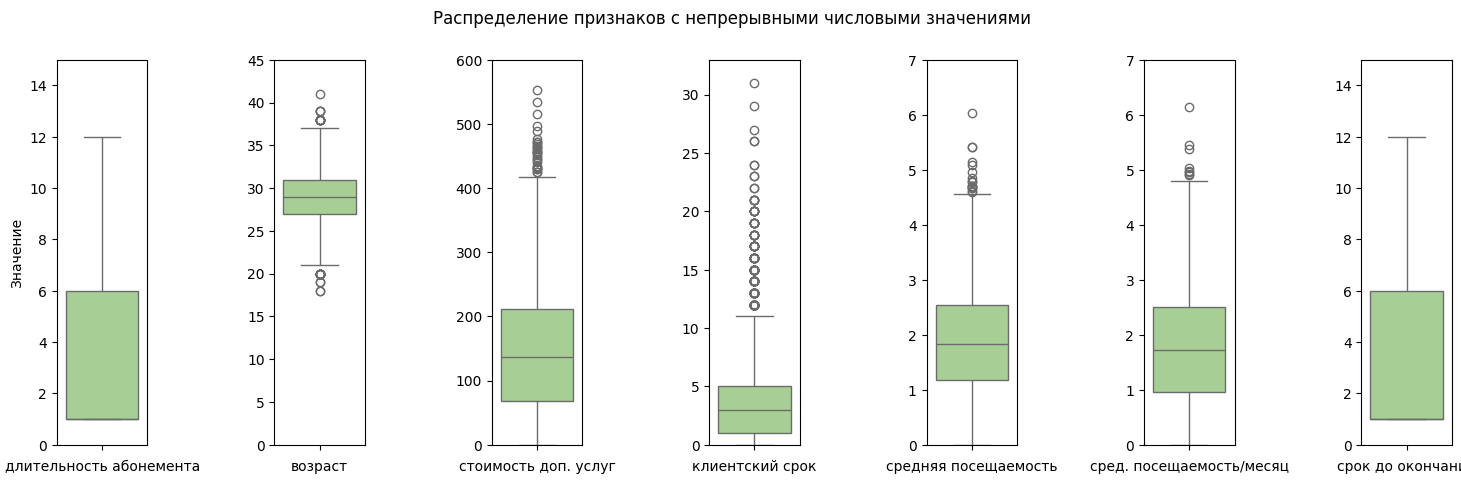

In [ ]:
# распределение признаков с непрерывными числовыми значениями
fig = plt.figure(figsize=(18, 5))
fig.suptitle('Распределение признаков с непрерывными числовыми значениями', size=(12))
color='#A3D98B'

ax1 = fig.add_subplot(1, 13, 1)
ax1 = sns.boxplot(y=data.contract_period, color=color)
ax1.set_ylim(0, 15)
ax1.set_xlabel('длительность абонемента') #rotation=30, ha='right')
ax1.set_ylabel('Значение')

ax2 = fig.add_subplot(1, 13, 3)
ax2 = sns.boxplot(y=data.age, color=color)
ax2.set_ylim(0, 45)
ax2.set_xlabel('возраст')
ax2.set_ylabel('')

ax3 = fig.add_subplot(1, 13, 5)
ax3 = sns.boxplot(y=data.avg_additional_charges_total, color=color)
ax3.set_ylim(0, 600)
ax3.set_xlabel('стоимость доп. услуг')
ax3.set_ylabel('')

ax4 = fig.add_subplot(1, 13, 7)
ax4 = sns.boxplot(y=data.lifetime, color=color)
ax4.set_ylim(0, 33)
ax4.set_xlabel('клиентский срок')
ax4.set_ylabel('')

ax4 = fig.add_subplot(1, 13, 9)
ax4 = sns.boxplot(y=data.avg_class_frequency_total, color=color)
ax4.set_ylim(0, 7)
ax4.set_xlabel('средняя посещаемость')
ax4.set_ylabel('')

ax4 = fig.add_subplot(1, 13, 11)
ax4 = sns.boxplot(y=data.avg_class_frequency_current_month, color=color)
ax4.set_ylim(0, 7)
ax4.set_xlabel('сред. посещаемость/месяц')
ax4.set_ylabel('')

ax4 = fig.add_subplot(1, 13, 13)
ax4 = sns.boxplot(y=data.month_to_end_contract, color=color)
ax4.set_ylim(0, 15)
ax4.set_xlabel('срок до окончания')
ax4.set_ylabel('');

__Итого:__ Распределение показывает, что стоимость доп. услуг выше 450 выглядит как выбросы. Также выглядят lifetime больше 24 мес. и средняя посещаемость больше 5 раз в неделю.

In [ ]:
# средние значения признаков по группам (ушедших vs оставшихся)
data_grouped = data.groupby('churn').mean()
data_grouped

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


__Итого:__ Если сравнивать средние значения в группах ушедших клиентов и оставшихся, то заметны различия в следующих признаках:

- использование промокода по акции "Приведи друга" - пришедшие в клуб по этой акции чаще остаются, чем уходят;

- посещение групповых занятий - коллективые тренировки мотивируют на дальнейшие занятия;

- средний возраст ушедших клиентов - 27 лет, оставшихся - 30. Видимо, необходимость "поддерживать форму" осознаётся "с годами" 😀

- длительность действующего абонемента - среди оставшихся больше обладателей полугодового (и годового) абонемента, чем среди ушедших;

- оставшиеся клиенты чаще ходили на тренировки и тратили больше за доп. услуги клуба;

- большинство ушедших клиентов - новички.

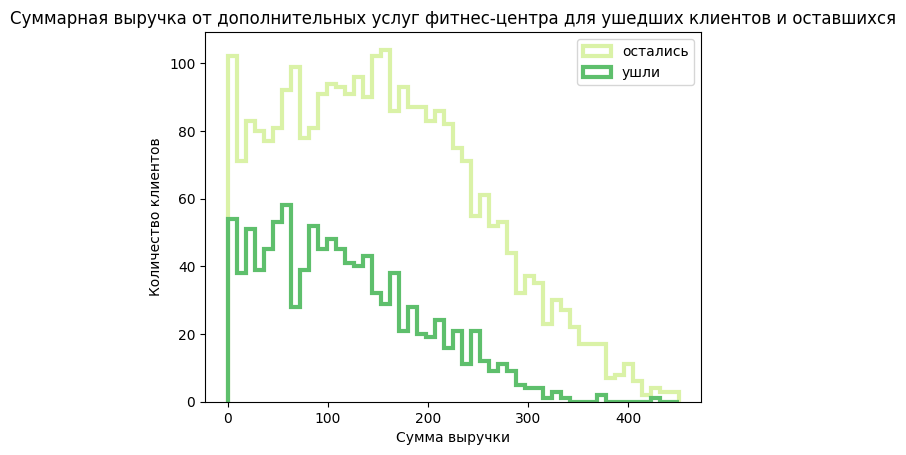

In [ ]:
# гистограммы признаков для ушедших клиентов и оставшихся
colors = {'0': '#DAF2A7', '1': '#5EBF6C'}
data.groupby('churn')['avg_additional_charges_total'].plot(kind='hist', histtype='step', alpha=1,
                                                   linewidth=3, legend=True,bins=50, range=(0, 450), color=colors)
plt.legend(['остались', 'ушли'])
plt.title('Суммарная выручка от дополнительных услуг фитнес-центра\
 для ушедших клиентов и оставшихся')
plt.xlabel('Сумма выручки')
plt.ylabel('Количество клиентов');

__Итого:__ Сумму до 100 ушедшие клиенты тратили наравне с оставшимися. Затем ушедшие стали меньше тратить на доп. услуги, а у оставшихся снижение выручки наблюдается после 200. (Что делать: стимулировать новичков на доп. услуги - скидками, акциями и т.п.)

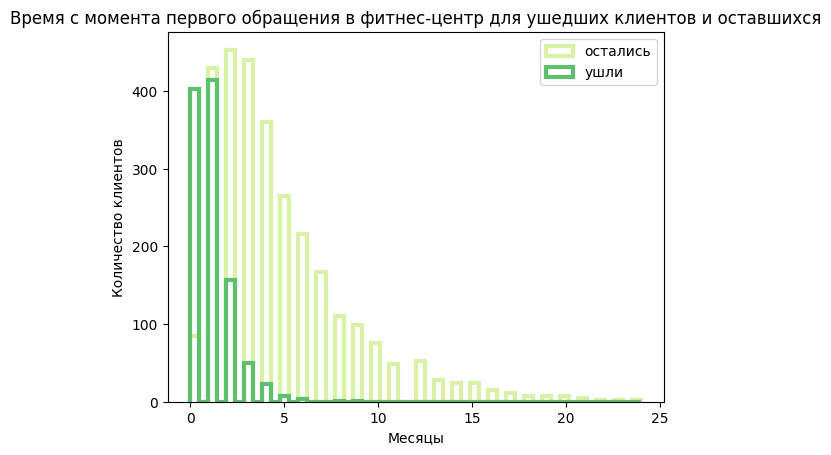

In [ ]:
colors = {'0': '#DAF2A7', '1': '#5EBF6C'}
data.groupby('churn')['lifetime'].plot(kind='hist', histtype='step', alpha=1,
                                                   linewidth=3, legend=True,bins=50, range=(0, 24), color=colors)
plt.legend(['остались', 'ушли'])
plt.title('Время с момента первого обращения в фитнес-центр для ушедших клиентов и оставшихся')
plt.xlabel('Месяцы')
plt.ylabel('Количество клиентов');

__Итого:__ Среди ушедших клиентов много тех, кто провёл в клубе лишь месяц или даже меньше, после 2-го месяца, проведённого в клубе, уходят гораздо реже (Почему: стимул, привычка, групповые занятия? Что делать: предлагать скидку или льготы на 2-й (критический для новичков) месяц занятий)

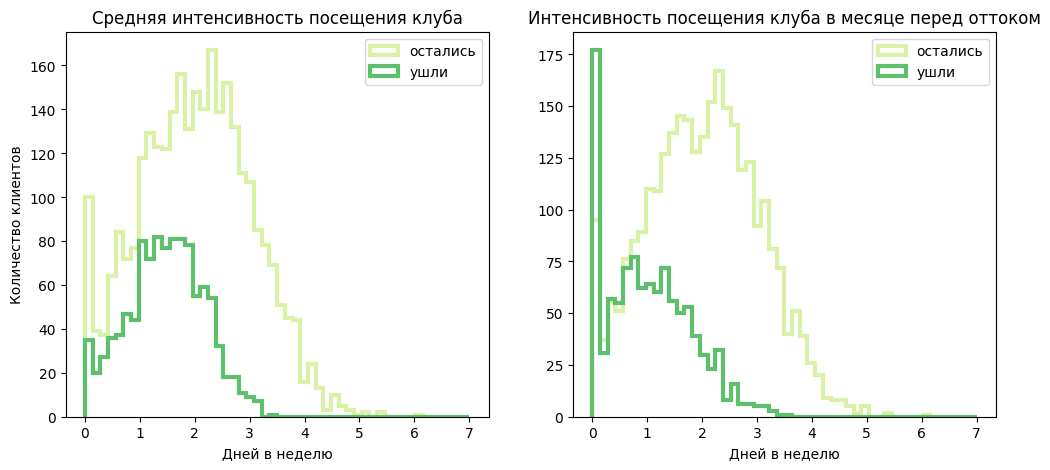

In [ ]:
fig = plt.figure(figsize=(12, 5))
colors = {'0': '#DAF2A7', '1': '#5EBF6C'}

ax1 = fig.add_subplot(1, 2, 1)
ax1 = data.groupby('churn')['avg_class_frequency_total'].plot(kind='hist', histtype='step', bins=50, linewidth=3, legend=True, range=(0, 7), alpha=1, color=colors)
plt.title('Средняя интенсивность посещения клуба')
plt.xlabel('Дней в неделю')
plt.ylabel('Количество клиентов')
plt.legend(['остались', 'ушли'])

ax2 = fig.add_subplot(1, 2, 2)
ax2 = data.groupby('churn')['avg_class_frequency_current_month'].plot(kind='hist', histtype='step', bins=50, linewidth=3, legend=True, range=(0, 7), alpha=1, color=colors)
plt.title('Интенсивность посещения клуба в месяце перед оттоком')
plt.xlabel('Дней в неделю')
plt.ylabel('')
plt.legend(['остались', 'ушли']);

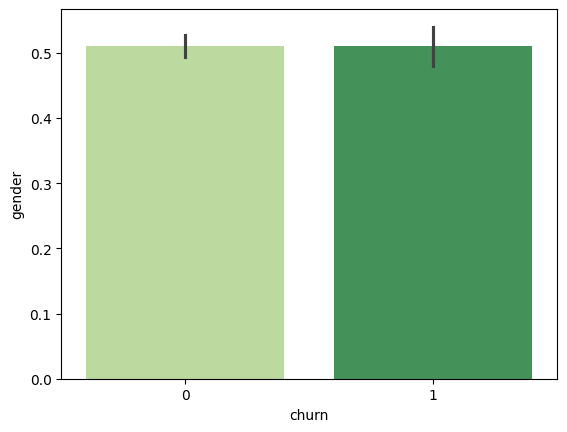

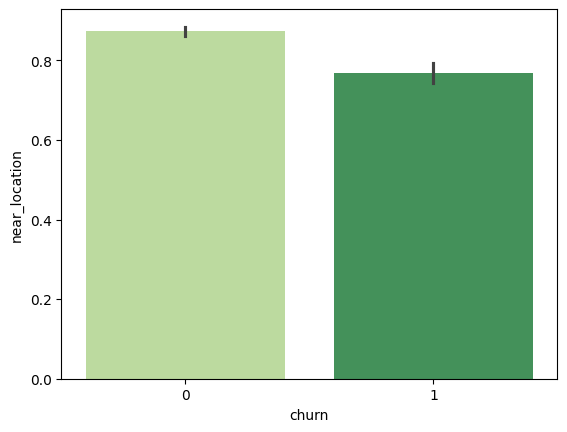

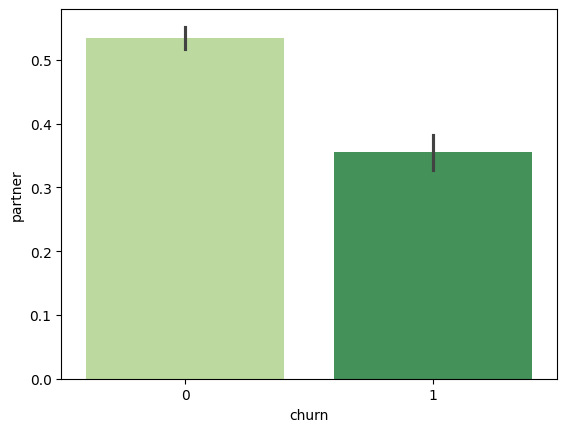

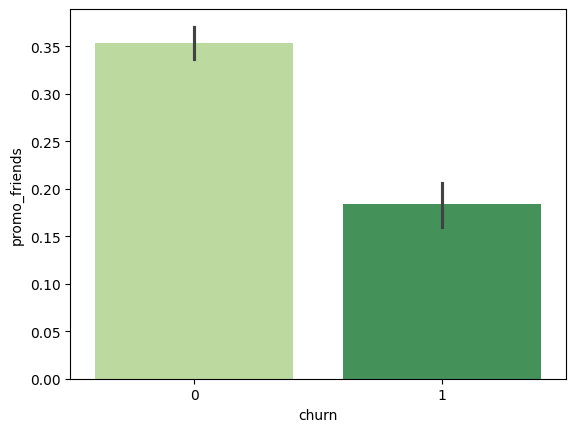

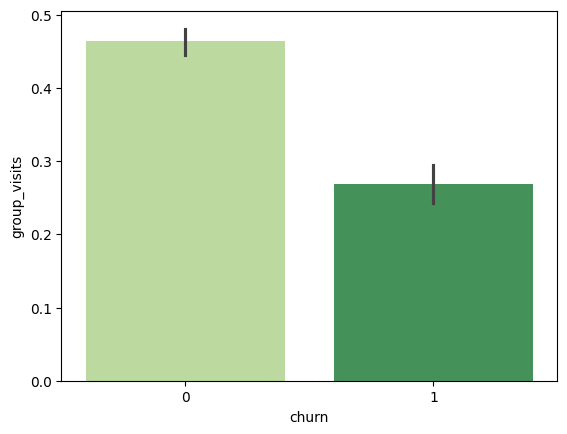

In [ ]:
bool_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'group_visits']

for column in bool_columns:
    sns.barplot(x=data['churn'], y=data[column], palette='YlGn')
    plt.show()

__Итого:__ Средняя интенсивность посещения клуба оставшимися клиентами почти не меняется от месяца к месяцу. Ушедшие-же клиенты перестают посещать клуб (или интенсивнсть их посещений заметно снижается) за месяц до факта оттока. (Что делать: замечать клиентов, переставших посещать клуб и предлагать "заморозку" абонемента, если есть "внешние" причины: болезнь, поездки и т.п.)

### Матрица корреляций

In [ ]:
#матрица корреляций
corr_matrix = data.corr()
corr_matrix

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


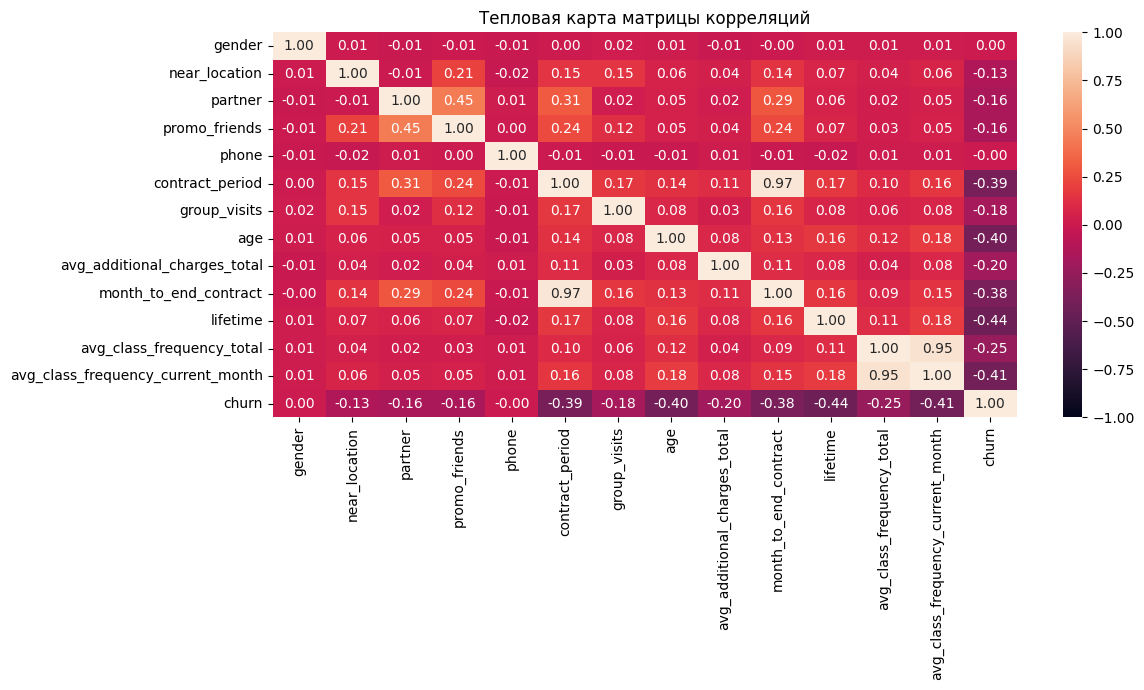

In [ ]:
# тепловая карта для матрицы корреляций
fig = plt.figure(figsize=(12, 5))
plt.title('Тепловая карта матрицы корреляций')
sns.heatmap(corr_matrix, annot=True, square=False, vmin = -1, vmax = 1, fmt=".2f")
plt.show()

In [ ]:
# удаление одного из коррелирующих признаков и неинформативного параметра 'phone'
data = data.drop(columns=['month_to_end_contract', 'phone'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   contract_period                    4000 non-null   int64  
 5   group_visits                       4000 non-null   int64  
 6   age                                4000 non-null   int64  
 7   avg_additional_charges_total       4000 non-null   float64
 8   lifetime                           4000 non-null   int64  
 9   avg_class_frequency_total          4000 non-null   float64
 10  avg_class_frequency_current_month  4000 non-null   float64
 11  churn                              4000 non-null   int64

__Итого:__ Значительной корреляции признаков и целевого значения нет. Заметна некоторая обратная корреляция лайфтайма, "посещаемости в последний перед оттоком месяц", возраста (что странно) и срока абонемента с фактом оттока.

Явно коррелируют между собой признаки длительности действия абонемента (общая и оставшаяся), а также интенсивность посещений клуба (средняя и в последний перед оттоком месяц).

### Выводы
1. Анализ представленных в данных признаков показывает, что попавшие в отток клиенты характеризуются меньшим сроком пребывания в клубе: как по длительности действия абонемента (в основном, на месяц), так и по интенсивности посещения занятий (особенно в месяц, предшествующий оттоку). Снижение интенсивности посещения занятий клиентом можно считать "красным флагом" для специалистов по работе с клиентами и сигналом к более активной работе именно с этим клиентом.

Кроме того, "склонные" к оттоку клиенты реже посещают групповые занятия и меньше денег тратят на дополнительные услуги, предоставляемые фитнес-центром.

Большинство ушедших клиентов пришли в клуб "сами по себе": вне рамок акции "Приведи друга" (т.е. не имели скидки на первый абонемент) и не являются сотрудниками компаний-партнёров клуба. Вероятно, в первую очередь их привлекло близкое расположение фитнес-центра к месту работы или проживания. Но, видимо, им нехватило мотивации и, может быть, внимания, чтобы остаться дольше.

2. "Лояльные" клиенты, чаще всего, также проживают или работают рядом с клубом, но имеют полугодовой абонемент, посещают занятия, в среднем, дважды в неделю, активно тренируются в группах и пользуются дополнительными услугами.

Кроме того, в среднем, они несколько старше ушедших клиентов (30 лет против 27-ми)

3. При анализе имеющихся данных была обнаружена корреляция признаков "на одну тему": общая длительность абонемента естественным образом коррелирует со сроком "до окончания". В данном случае для дальнейших исследований можно использовать один из этих признаков, например, общую длительность абонемента.

Кроме того, имеется корреляция средней интенсивности посещений клуба и интенсивности в последний месяц. Но в этом случае оба признака нужно оставить в датасете, поскольку разница между этими признаками даёт важную информацию о тренде снижения интенсивности занятий, что может сигнализировать о снижении заинтересованности клиента в целом.

## Построение модели прогнозирования оттока клиентов

### Подготовка данных и построение модели LogisticRegression

In [ ]:
# разделение данных на обучающую и валидационную выборки
X = data.drop('churn', axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# выбор модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

# стандартизация признаков
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [ ]:
# функция для вывода метрик
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [ ]:
# обучение модели на стандартизированных данных
lr_model.fit(X_train_st, y_train)

# прогнозирование и вероятность наступления события (оттока)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

#display(lr_predictions)
#display(lr_probabilities)

In [ ]:
# вывод метрик точности прогнозирования для модели логистической регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


### ROC-кривая для модели логистической регрессии

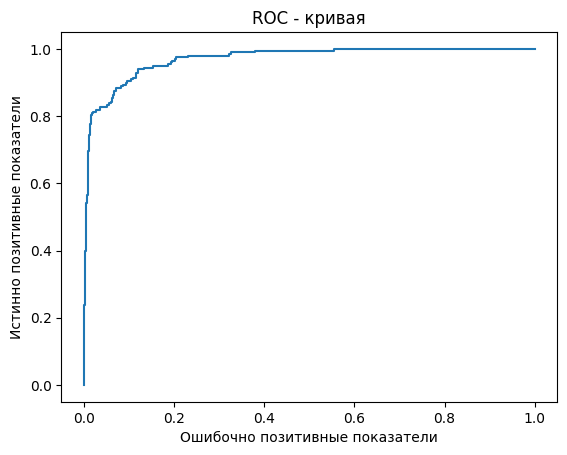

In [ ]:
# построение ROC кривой
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probabilities)

plt.plot(fpr, tpr)
plt.title('ROC - кривая')
plt.ylabel('Истинно позитивные показатели')
plt.xlabel('Ошибочно позитивные показатели')
plt.show();

### Постороение модели RandomForestClassifier

In [ ]:
# выбор модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 0)

# при n_estimators = 100, модель RandomForestClassifier показывает менее точные метрики:
#Accuracy: 0.92
#Precision: 0.84
#Recall: 0.81
#F1: 0.83
#ROC_AUC: 0.97

# обучение модели на стандартизированных данных
rf_model.fit(X_train_st, y_train)

# прогнозирование и вероятность наступления события (оттока)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# вывод метрик точности прогнозирования для модели на основе алгоритма случайного леса
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:',
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.80
	F1: 0.83
	ROC_AUC: 0.97


### ROC-кривая для модели на основе алгоритма случайного леса

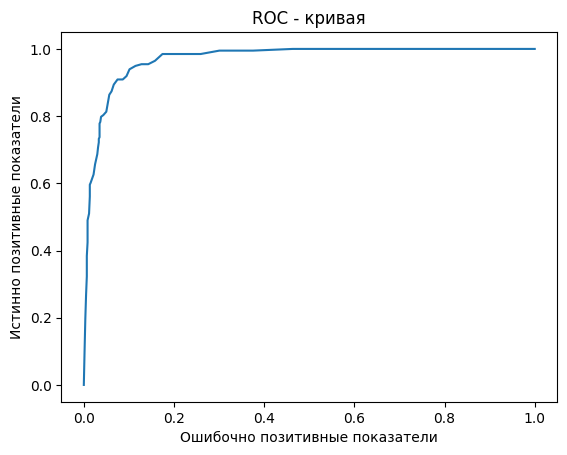

In [ ]:
# построение ROC кривой
fpr, tpr, _ = metrics.roc_curve(y_test, rf_probabilities)

plt.plot(fpr, tpr)
plt.title('ROC - кривая')
plt.ylabel('Истинно позитивные показатели')
plt.xlabel('Ошибочно позитивные показатели')
plt.show();

### Выводы:

1. Для прогнозирования оттока клиентов (задача бинарной классификации) были выбраны две модели: логистической регрессии LogisticRegression и алгоритм "случайного леса" RandomForestClassifier. Данные были подготовлены для обучения моделей: разделены на обучающую и валидационную выборки и стандартизированы для исключения влияния разницы в величинах признаков.

Далее модели были обучены на обучающей выборке и затем работа моделей была проверена на валидационной выборке путём подсчёта метрик, отражающих точность предсказаний обеих моделей. Ддя оценки точности предсказаний были использованы следующие метрики:

- `Accuracy` - доля правильных ответов, показывает долю верно угаданных ответов из всех прогнозов. Для наших моделей" `Accuracy` составляет 0.92 - достаточно высокий показатель. Но, поскольку целевая переменная делится не в пропорции 50 на 50, есть смысл использовать и другие метрики;

- `Precision` - точность, показывает, какая доля прогнозов относительно "1" класса (факта оттока) верна. Можно сказать, это `Accuracy` только для прогноза оттока. В нашем случае эта метрика показывает 0.85 правильных предсказаний оттока. Тоже неплохой показатель;

- `Recall` - полнота - доля правильно обнаруженных фактов оттока, показывает, сколько реальных "1" (фактов оттока) модель смогла обнаружить в валидационной выборке. Для наших моделей этот показатель составляет 0.83 - чуть хуже метрики `Precision`;

- `F1`-мера - сводная метрика, учитывающая баланс между метриками `Precision` и `Recall` и веса признаков. В нашем случае данная метрика может быть самой важной для оценки точности предсказаний моделей. Для наших моделей она составляет 0.84, что является хорошим результатом;

- `ROC_AUC` - комбинированная метрика, кривая ROC (график, который иллюстрирует производительность классификационной модели и связывает "истинно позитивные" и ошибочно позитивные" показатели ) и показатель AUC (Area Under the ROC Curve - мера, которая позволяет суммировать производительность модели, измеряя площадь под кривой ROC). Данная метрика используется, чтобы показать насколько корректно упорядочены вероятности предсказанных событий "0" и "1". Для наших моделей это 0.97 - высокий показатель.

Таким образом, получилось обучить две модели разных классов для предсказания факта оттока клиентов с достаточно высокой точностью.

2. Изменением параметра n_estimators (число используемых "деревьев" в модели на основе алгоритма "случайного леса") для модели "случайного леса" удалось получить метрики, совпадающие с метриками логистической регрессии.

## Кластеризация клиентов

### Матрица растояний и дендрограмма

In [ ]:
# стандартизация данных без целевой переменной
X_st = scaler.fit_transform(X)

# построение матрицы расстояний и дендрограммы
linked = linkage(X_st, method = 'ward')

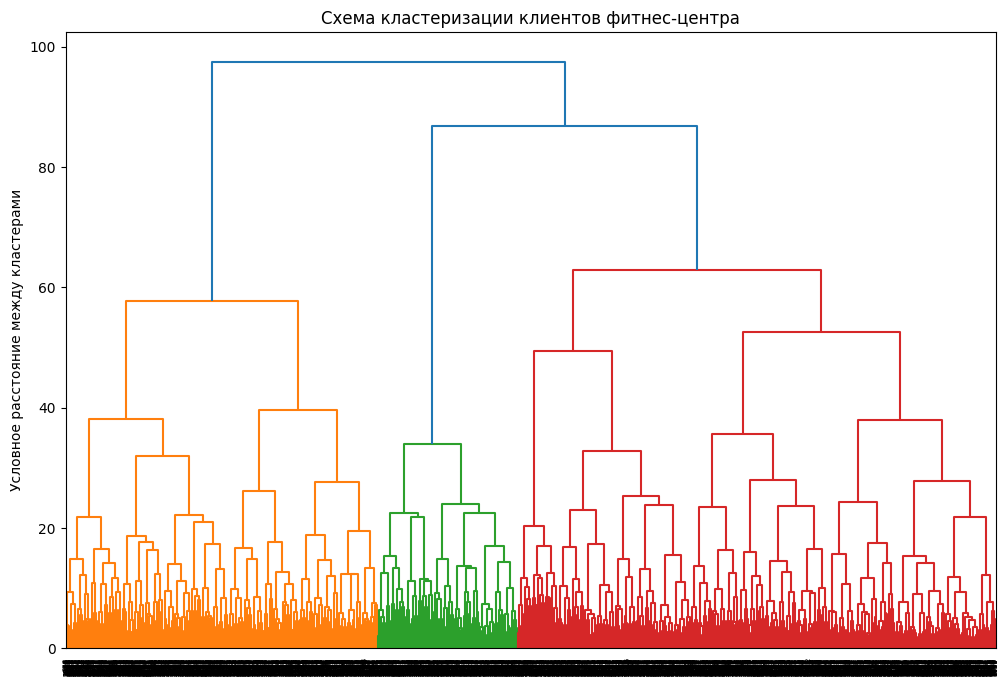

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top')
plt.title('Схема кластеризации клиентов фитнес-центра')
plt.ylabel('Условное расстояние между кластерами')
plt.show()

__Итого:__ По дендрограмме можно выбрать от 4 (по количеству использованных цветов) до 6 кластеров (по количеству пересекаемых линий на уровне середины дендрограммы). Поэтому можно оставить рекомендованные 5 кластеров для последующих расчётов.

### Модель кластеризации на основании алгоритма K-Means

In [ ]:
# применение алгоритма KMeans c числом кластеров 5
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_st)
labels

array([1, 3, 0, ..., 2, 1, 4], dtype=int32)

In [ ]:
# сохранение меток (номера) кластера в качестве параметра датасета
X['cluster'] = labels

# средние значения признаков по кластерам
features = X.groupby('cluster').mean()
features

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster,,,,,,,,,,,
0,0.486192,1.000000,0.292050,0.000000,3.069456,0.333054,28.420921,132.060633,2.541423,1.231268,1.014137
1,0.486088,1.000000,0.788871,1.000000,5.018003,0.438625,28.675941,140.422778,3.153846,1.206381,1.076872
2,0.513067,0.984869,0.962861,0.723521,9.317744,0.580468,30.287483,165.816174,5.165062,2.595108,2.594616
3,0.566857,0.981714,0.144000,0.060571,3.994286,0.488000,30.060571,163.394647,5.076571,2.757200,2.752786
4,0.496622,0.000000,0.489865,0.074324,2.908784,0.226351,28.599662,136.225443,2.935811,1.703413,1.525966


__Итого:__ Алгоритм разделил всех клиентов на 5 кластеров. Причём каждый кластер имеет свои уникальные черты:

- в кластере №0 собраны клиенты, которые почти не пользовались промокодом для оплаты абонемента;

- клиенты, попавшие в кластер №1 посещают клуб почти по три раза в неделю;

- почти все клиенты в кластере №2, имеют годовой абонемент;

- в кластере №3 оказались клиенты, пришедшие по акции "Приведи друга";

- никто из попавших в кластер №4 не проживает рядом с клубом;



In [ ]:
#X.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'cluster']

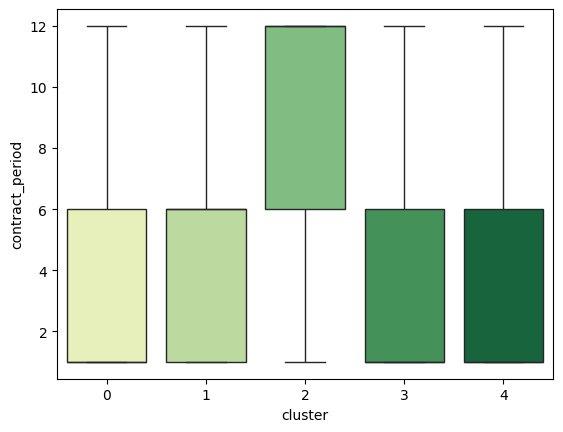

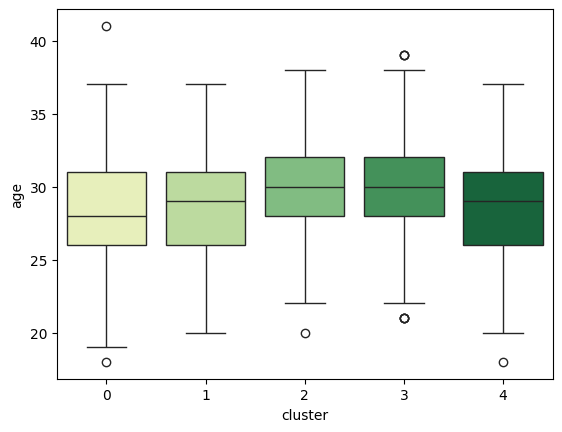

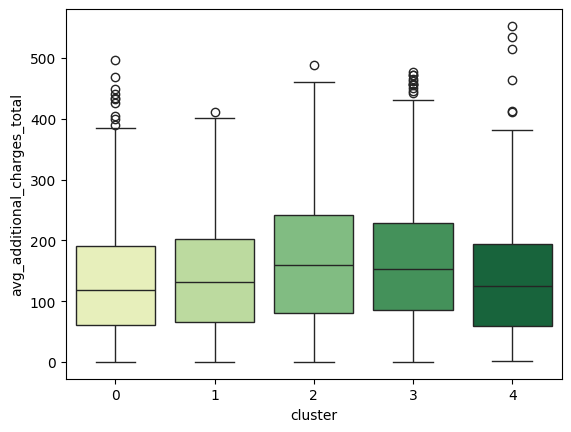

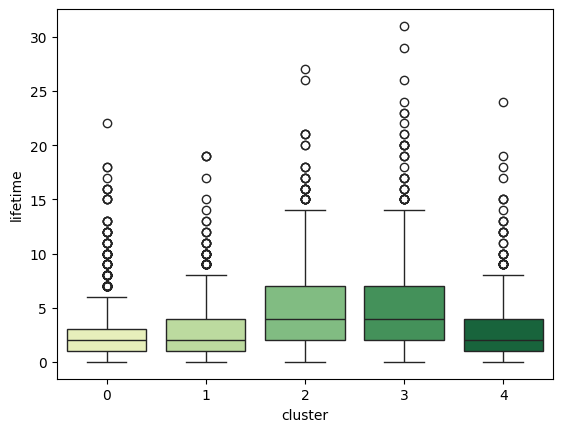

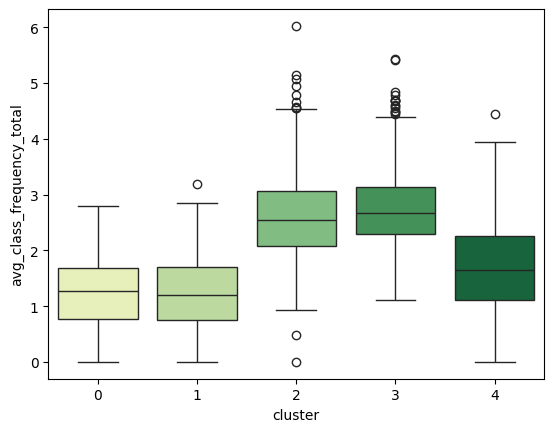

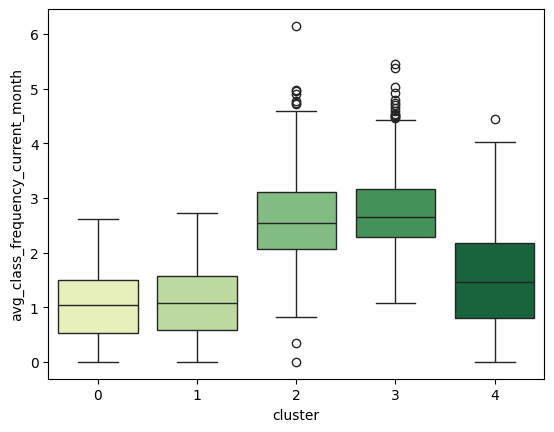

In [ ]:
columns_con = ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
'avg_class_frequency_current_month']

for column in columns_con:
    sns.boxplot(x=X['cluster'], y=X[column], palette='YlGn')
    plt.show()

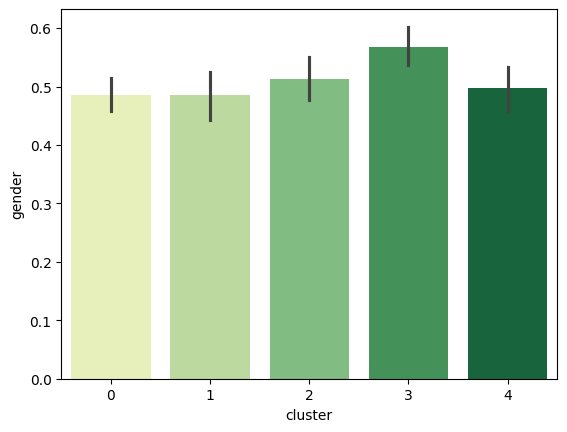

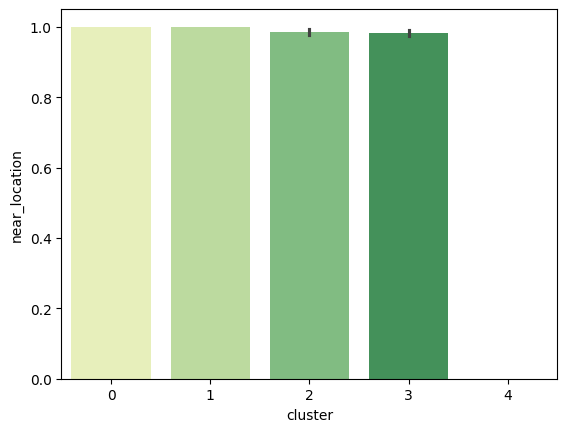

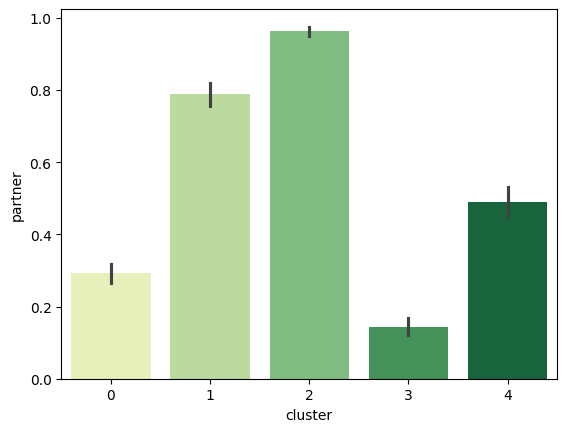

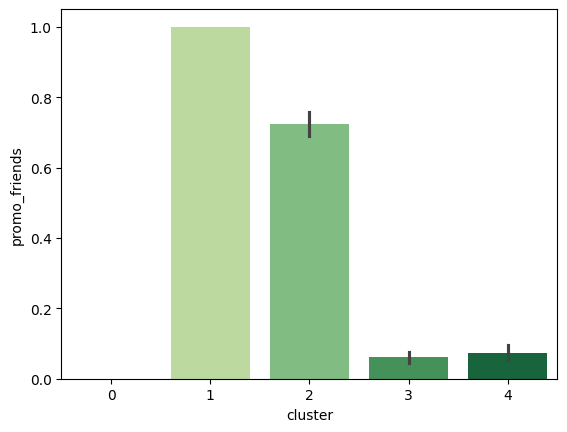

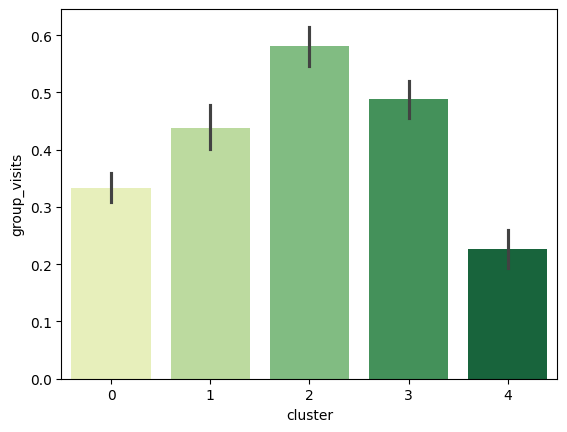

In [ ]:
columns_dis = ['gender', 'near_location', 'partner', 'promo_friends', 'group_visits']

for column in columns_dis:
    sns.barplot(x=X['cluster'], y=X[column], palette='YlGn')
    plt.show()

__Итого:__ Визуализация позволяет подробнее изучить различия в значениях признаков в разных кластерах. Некоторые кластеры заметно выделяются какими либо признаками:

- все клиенты, попавшие в условный нулевой кластер, проживают или работают рядом с клубом, почти не пользовались промокодом для оплаты абонемента и меньше всех тратят на доп. услуги;

- почти все клиенты, распределённые алгоритмом во второй кластер, имеют годовой абонемент, больше всех тратят на доп. услуги и больше половины из них посещают групповые занятия;

- в третьем кластере оказались клиенты, пришедшие по акции "Приведи друга" и проживающие (или работающие) рядом с клубом;

- никто из попавших в четвёртый кластер не проживает/работает рядом с клубом и они меньше других участвуют в групповых занятиях;

- клиенты, попавшие в первый кластер, самые возрастные и, возможно поэтому, самые активные: давно в клубе и регулярно его посещают (почти по три раза в неделю).

### Доля оттока по кластерам

In [ ]:
# добавление номера кластера в data
data['cluster'] = labels

# средние значения признаков по кластерам
churn_features = data.groupby('cluster').mean()
churn_features

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.486192,1.000000,0.292050,0.000000,3.069456,0.333054,28.420921,132.060633,2.541423,1.231268,1.014137,0.471967
1,0.486088,1.000000,0.788871,1.000000,5.018003,0.438625,28.675941,140.422778,3.153846,1.206381,1.076872,0.289689
2,0.513067,0.984869,0.962861,0.723521,9.317744,0.580468,30.287483,165.816174,5.165062,2.595108,2.594616,0.015131
3,0.566857,0.981714,0.144000,0.060571,3.994286,0.488000,30.060571,163.394647,5.076571,2.757200,2.752786,0.072000
4,0.496622,0.000000,0.489865,0.074324,2.908784,0.226351,28.599662,136.225443,2.935811,1.703413,1.525966,0.415541


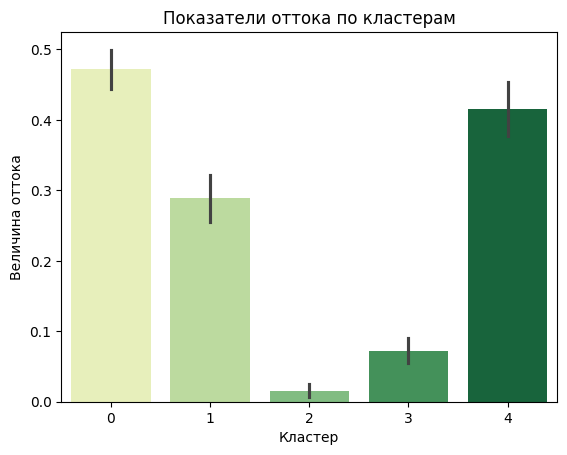

In [ ]:
# отток по кластерам
sns.barplot(x=data['cluster'], y=data['churn'], palette='YlGn')
plt.title('Показатели оттока по кластерам')
plt.ylabel('Величина оттока')
plt.xlabel('Кластер')
plt.show()

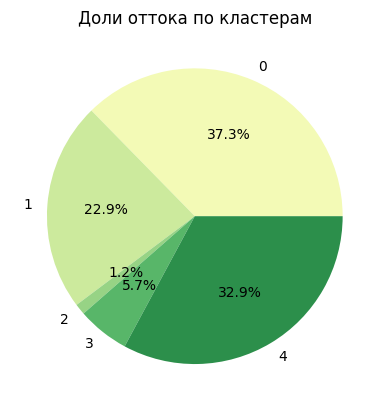

In [ ]:
colors = sns.color_palette(palette='YlGn')
churn_features['churn'].plot(kind='pie', autopct = '%1.1f%%', colors=colors)
plt.title('Доли оттока по кластерам')
plt.ylabel('')
plt.show()

### Выводы:

1. Построение матрицы расстояний и дендрограммы помогло определиться с количеством кластеров (5) для дальнейшей кластеризации клиентов моделью на основании алгоритма K-Means.

2. Модель успешно разделила клиентов на 5 кластеров, каждый из которых характеризуется определенными значениями признаков, уникальными для каждого кластера. Вывод средних значений признаков, сгруппированных по кластерам, и последующая визуализация этих значений позволила отметить особенности каждого кластера: в одном из них алгоритм сгруппировал обладателей годового абонемента, в другом - клиентов, пришедших в клуб по акции, в третьем - проживающих (или работающих) в другом районе клиентов.

3. Группировка параметра оттока по кластерам показала, что наибольшую долю оттока имеют нулевой и четвертый кластеры: они в сумме дают более 2/3 общего оттока. Клиенты из кластера №2 наоборот, самые лояльные клубу.

Таким образом, можно предположить, что клиенты, которые не воспользовались промокодом для оплаты абонемента, меньше других тратят на доп. услуги, не проживают/работают рядом с клубом и меньше других участвуют в групповых занятиях, более склонны к оттоку, чем те, кто имеет годовой абонемент и активно посещает групповые занятия.

## Выводы и базовые рекомендации по работе с клиентами

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

__Общие выводы по проекту:__

1. Целью проекта было:

- проведение анализа предоставленных отделом по работе с клиентами данных и прогнозирование вероятности оттока клиентов на уровне следующего месяца;

- подготовка предложений по удержанию клиентов.

2. В проекте были использованы данные о клиентах за месяц до оттока и факт оттока на определённый месяц, а также данные о пользовательской активности клиентов в клубе, представленные в файле gym_churn.csv.

3. В процессе предобработки данные были проверены на пропуски и дубликаты, названия столбцов приведены в нижний регистр.

4. В процессе исследовательского анализа были проанализированы признаки, сгруппированные по факту оттока и построены графики, показывающие, что существуют определенные тенденции в поведении клиентов, сигнализирующие о возможном оттоке, например, снижение интенсивности посещений клуба или редкое участие в групповых занятиях.

Кроме того, была построена матрица корреляций и выявлены коррелирующие признаки, один из которых был удален. Кроме того, из данных был удален неинформативный параметр наличия телефона клиента.

5. Для прогнозирования оттока клиентов были построены модели классификации на основе алгоритмов логистической регрессии и "случайного леса". Метрики обеих моделей показали достаточно хорошую точность, а значит, могут быть использованы для задачи прогнозирования оттока.

6. Была проведена кластеризация клиентов с использованием алгоритма K-Means: клиенты клуба были поделены на 5 групп (кластеров), каждая из которых имела уникальное сочетание значений признаков. Дальнейшие исследования показали важность этого сочетания признаков для предсказания оттока клиентов.

__Рекомендации по снижению оттока клиентов:__

1. Анализ представленных в данных признаков показывает, что попавшие в отток клиенты характеризуются меньшим сроком пребывания в клубе: как по длительности действия абонемента (в основном, на месяц), так и по интенсивности посещения занятий (особенно в месяц, предшествующий оттоку).

Рекомендация: снижение интенсивности посещения занятий клиентом можно считать "красным флагом" для специалистов по работе с клиентами и сигналом к более активной работе именно с этим клиентом: таким можно, например, предлагать "заморозку" абонемента, если есть "внешние" причины: болезнь, поездки и т.п.

2. Как показал анализ, "склонные" к оттоку клиенты реже посещают групповые занятия, а большинство ушедших клиентов пришли в клуб "сами по себе": вне рамок акции "Приведи друга" (т.е. не имели скидки на первый абонемент) и не являются сотрудниками компаний-партнёров клуба. Вероятно, в первую очередь их привлекло близкое расположение фитнес-центра к месту работы или проживания. Но, видимо, им нехватило мотивации и, может быть, внимания, чтобы остаться дольше.

Рекомендация: наличие коллектива или даже просто приятеля всегда стимулирует продолжать занятия. Кроме того, клиенты, "пришедший с другом" получают скидку на покупку абонемента. Поэтому есть смысл проводить акции по привлечению новых клиентов через уже имеющихся: например, "спортивная семья", семейные абонементы, состязания для детей клиентов клуба "Спротивный праздник" и т.п.

Кроме того, поощрение клиентов к посещению групповых тренировок поспособствует созданию коллективной атмосферы в клубе, что в свою очередь, повышает мотивацию продолжать занятия.

3. Среди ушедших клиентов много тех, кто провёл в клубе лишь месяц или даже меньше. После второго месяца, проведённого в клубе, уходят гораздо реже, поскольку за этот срок уже формируется привычка, появляются первые результаты тренировок и появляется стимул продолжать. Таким образом, второй месяц занятий - критически важный период для клиента.

Рекомендация: по окончании первого месячного абонемента есть смысл стимулировать продолжение занятий предложением скидок на более длительные абонементы или приглашением на льготные групповые тренировки.